In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv('WineQT.csv')

In [3]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [4]:
# Display the first few rows of the dataset
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

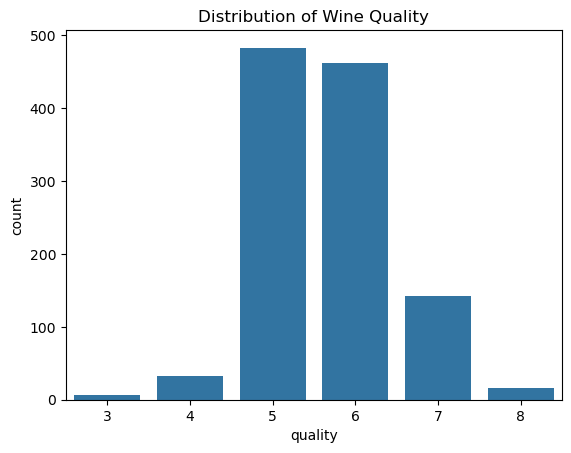

In [5]:
# visualize the distribution of wine quality
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.show()


In [6]:
# Classifier Models
# Assuming 'quality' is the output variable
X = df.drop('quality', axis=1)  # Features
y = df['quality']  # Target variable


In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [9]:
# Stochastic Gradient Descent Classifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
sgd_predictions = sgd_model.predict(X_test)


In [10]:
# Support Vector Classifier (SVC)
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)

In [11]:
# Model Evaluation
# Evaluate each model's performance
def evaluate_model(model, predictions):
    accuracy = accuracy_score(y_test, predictions)
    print(f'Model: {type(model).__name__}')
    print(f'Accuracy: {accuracy}')
    print('Classification Report:')
    print(classification_report(y_test, predictions))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, predictions))
    print('\n')
evaluate_model(rf_model, rf_predictions)
evaluate_model(sgd_model, sgd_predictions)
evaluate_model(svc_model, svc_predictions)


Model: RandomForestClassifier
Accuracy: 0.6637554585152838
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.74      0.71        96
           6       0.62      0.66      0.64        99
           7       0.80      0.62      0.70        26
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.42      0.40      0.41       229
weighted avg       0.64      0.66      0.65       229

Confusion Matrix:
[[ 0  3  3  0  0]
 [ 0 71 25  0  0]
 [ 0 30 65  4  0]
 [ 0  0 10 16  0]
 [ 0  0  2  0  0]]


Model: SGDClassifier
Accuracy: 0.4847161572052402
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.75      0.16      0.26        96
           6       0.46      0.97      0.62        99
           7       0.00     

C:\Users\afrah\.conda\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\afrah\.conda\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\afrah\.conda\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

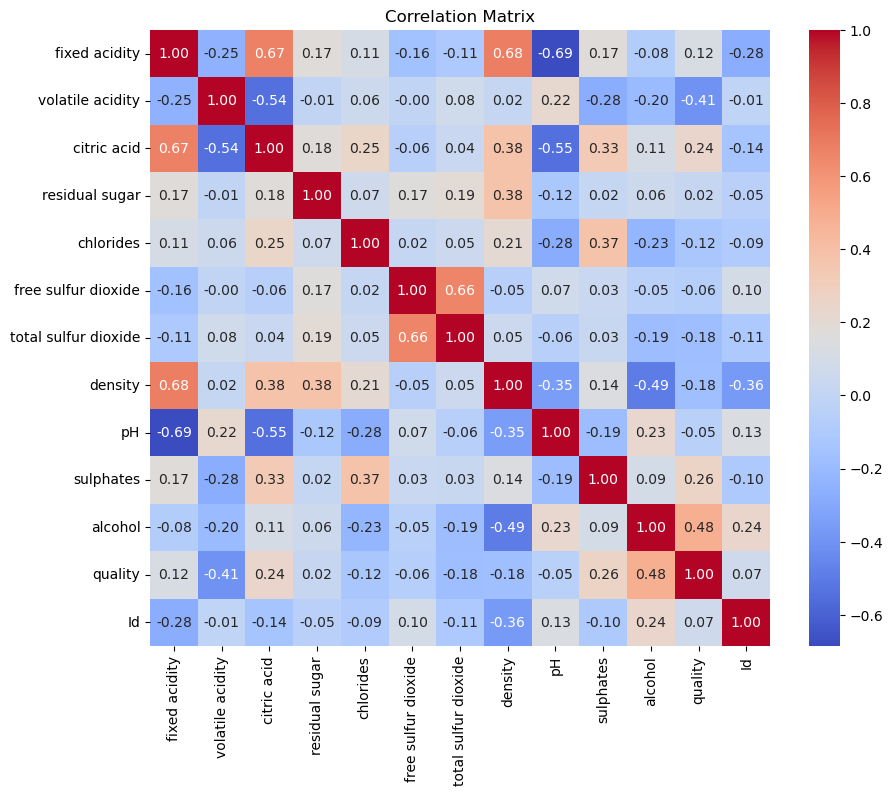

In [12]:
# Chemical Qualities Analysis
# For example, analyze the correlation between features and wine quality
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()